In [1]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 5.0 MB/s eta 0:00:00


- In the following example, you will see how it is possible to use a cross-lingual language model pretrained
    on the XNLI dataset to find similar texts from different languages. A use-case scenario is where
    a plagiarism detection system is required for this task. We will use sentences from the Azerbaijani
    language and see whether XLM-R finds similar sentences from English—if there are any. The
    sentences from both languages are identical. Here are the steps to take:

In [2]:
from sentence_transformers import SentenceTransformer,util

In [3]:
model=SentenceTransformer("stsb-xlm-r-multilingual")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/709 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [33]:
azeri_sentences=[
'Pişik çöldə oturur',
'Bir adam gitara çalır',
'Mən makaron sevirəm',
'Yeni film möhtəşəmdir',
'Pişik bağda oynayır',
'Bir qadın televizora baxır',
'Yeni film çox möhtəşəmdir',
'Pizzanı sevirsən?' ]
english_sentences = [
'The cat sits outside',
'A man is playing guitar',
'I love pasta',
'The new movie is awesome',
'The cat plays in the garden',
'A woman watches TV',
'The new movie is so great',
'Do you like pizza?']

- And the next step is to represent these sentences in vector space by using the XLM-R model. You can do this by simply using
    the encode function of the model, as follows:

In [34]:
azeri_representation=model.encode(azeri_sentences)
english_representation=model.encode(english_sentences)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
results = []
for azeri_sentence, query in zip(azeri_sentences, azeri_representation):
    id_, score = util.semantic_search(query,english_representation)[0][0].values()
results.append({
    "azeri": azeri_sentence,
    "english": english_sentences[id_],
    "score": round(score, 4)
})

In [36]:
results

[{'azeri': 'Pizzanı sevirsən?',
  'english': 'Do you like pizza?',
  'score': 0.9366}]

In [37]:
import pandas as pd
pd.DataFrame(results)

,azeri,english,score
0,Pizzanı sevirsən?,Do you like pizza?,0.9366


- On the other hand, there are alternative bi-encoders available too. Such approaches provide a pair
    encoding of two sentences and classify the result to train the model. In such cases, Language-
    Agnostic BERT Sentence Embedding (LaBSE) may be a good choice too, and it is available in the
    sentence-transformers library and in TensorFlow Hub too. LaBSE is a dual encoder based on
    Transformers, which is similar to Sentence-BERT, where two encoders that have the same parameters
    are combined with a loss function based on the dual similarity of two sentences.
    Using the same example, you can change the model to LaBSE in a very simple way and rerun the
    previous code (Step 1), as follows:

In [38]:
model = SentenceTransformer("LaBSE")

In [39]:
results = []
for azeri_sentence, query in zip(azeri_sentences, azeri_representation):
    id_, score = util.semantic_search(query,english_representation)[0][0].values()
results.append({
    "azeri": azeri_sentence,
    "english": english_sentences[id_],
    "score": round(score, 4)
})

In [40]:
pd.DataFrame(results)

,azeri,english,score
0,Pizzanı sevirsən?,Do you like pizza?,0.9366


# visualizing cross-lingual textual similarity

In [41]:
!pip install sentence_transformers datasets transformers umap-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [42]:
from datasets import load_dataset
import pandas as pd
data=load_dataset(
    "xtreme","tatoeba.rus",
    split="validation"

)

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/tatoeba.rus/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e. Subsequent calls will reuse this data.


In [43]:
data

Dataset({
    features: ['source_sentence', 'target_sentence', 'source_lang', 'target_lang'],
    num_rows: 1000
})

In [45]:
pd.DataFrame(data)[['source_sentence','target_sentence']]

,source_sentence,target_sentence
0,"Я знаю много людей, у которых нет прав.\n",I know a lot of people who don't have driver's...
1,"У меня много знакомых, которые не умеют играть...",I know a lot of people who don't know how to p...
2,Мой начальник отпустил меня сегодня пораньше.\n,My boss let me leave early today.\n
3,Я загорел на пляже.\n,I tanned myself on the beach.\n
4,Вы сегодня проверяли почту?\n,Have you checked your email today?\n
...,...,...
995,Что сказал врач?\n,What did the doctor say?\n
996,"Я рад, что ты сегодня здесь.\n",I'm glad you're here today.\n
997,"Фермеры пригнали в деревню пять волов, девять ...",The farmers had brought five oxen and nine cow...
998,Жужжание пчёл заставляет меня немного нервнича...,The buzzing of the bees makes me a little nerv...


In [46]:
model=SentenceTransformer("stsb-xlm-r-multilingual")
k=30
q=data["source_sentence"][:k]+data["target_sentence"][:k]

In [49]:
emb=model.encode(q)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

array([[-0.1792754 ,  0.2616579 ,  0.11907059, ...,  0.06404077,
        -0.7630787 , -0.05255661],
       [-0.43628383,  0.17613338, -0.9264999 , ...,  0.2113846 ,
        -0.5309943 ,  0.7007919 ],
       [-0.22672026, -0.01896114,  1.4832442 , ...,  0.3653735 ,
        -0.47576106, -0.02831843],
       ...,
       [ 0.74544287, -0.53857917,  1.238583  , ..., -0.0528123 ,
        -0.5384992 , -0.25216505],
       [ 0.35156986,  0.5497893 ,  0.96401936, ..., -0.46237278,
        -0.02523079,  0.1484054 ],
       [ 0.5214808 ,  0.6226566 ,  0.9596281 , ..., -0.37736726,
        -0.12398337,  0.51807815]], dtype=float32)

In [50]:
len(emb)

60

- UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that is commonly used for visualizing high-dimensional data in a lower-dimensional space. UMAP is particularly well-suited for preserving both local and global structures within the data, making it useful for a variety of applications, including exploratory data analysis, clustering, and visualization.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import umap
import pylab

2024-02-19 06:17:42.600850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 06:17:42.600966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 06:17:42.726295: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


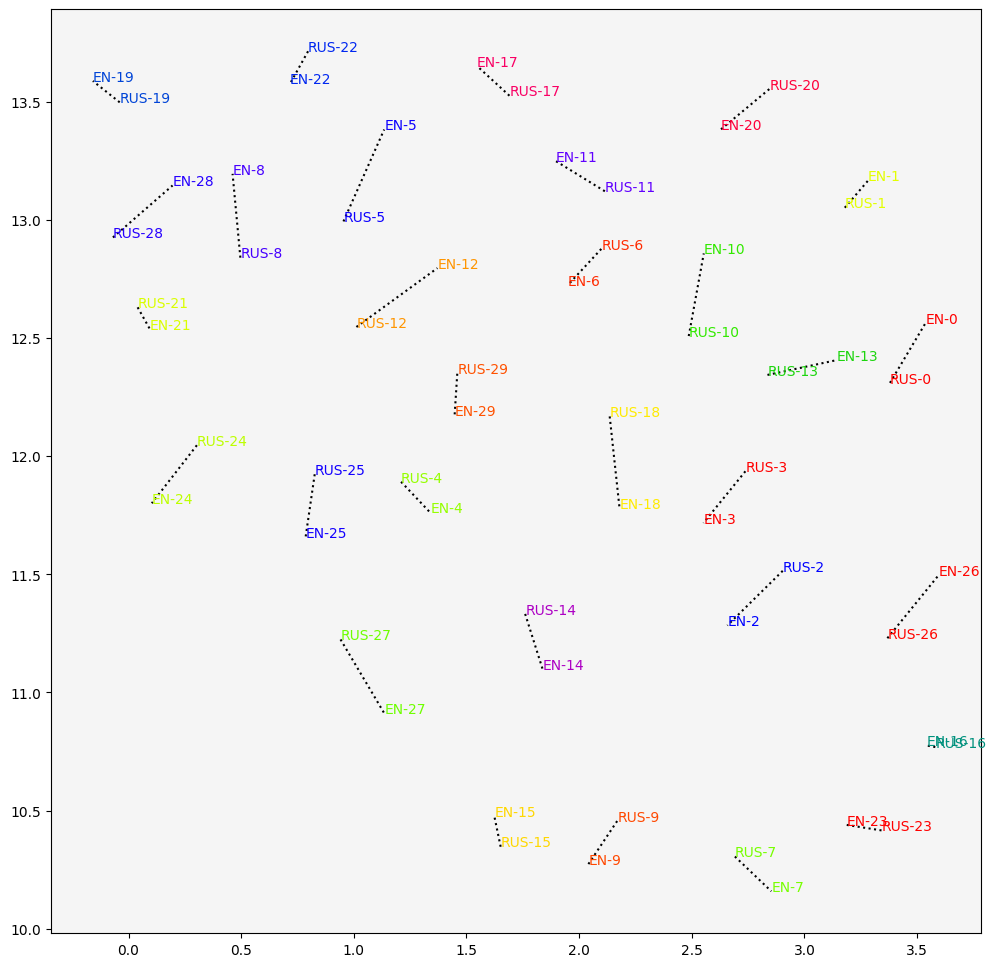

In [57]:
X= umap.UMAP(n_components=2, random_state=42).fit_transform(emb)
idx= np.arange(len(emb))
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('whitesmoke')
cm = pylab.get_cmap("prism")
K=k
colors = list(cm(1.0*i/K) for i in range(K))
for i in idx:
    if i<K:
        ax.annotate("RUS-"+str(i), # text
        (X[i,0], X[i,1]), # coordinates
        c=colors[i]) # color
        ax.plot((X[i,0],X[i+K,0]),(X[i,1],X[i+K,1]),"k:")
    else:
        ax.annotate("EN-"+str(i%K),
        (X[i,0], X[i,1]),
        c=colors[i%K])